# Gambling Strategies for Penny Slot Players

*Note: If you or anyone else you know has a gambling problem, call the National Problem Gambling hotline: 1-800-522-4700*

My girlfriend and I like to hit the casino from time to time, and we get a kick out of the penny slots. We place small bets and aim to spend no more than 100 dollars total per session. Now - any "real" gambler would say that the slot machines are a waste of time because they favor the house much more than table games, where you actually make decisions that affect the outcome. And they'd be correct. But what can I say. We like slots!

The slots at the casino we go to roughly pay out 95\% of the money they take in over an infinite amount of time. This long-term percentage of payback is known as the **RTP**, or Return to Player. But we're not gambling for infinitely long and we don't have an infinite pool of money. Rather than thinking in these terms, we will consider a more realistic scenario. The question is: is there a superior strategy for someone gambling with hard spending and time limits? Or is everything so random under these constraints that you might as well do whatever you want?

### Task

We will study two kinds of machines that vary in what is called **volatility** - basically the payout variance. Highly volatile machines pay out big but rarely, while low-volatility machines distribute small payouts more often but the jackpot is not as large. Low-volatility machines have become quite popular with casino owners in Vegas as the small payouts keep people hooked and playing for longer.

We will run many simulations on these types of machines, and see how the results change with our betting strategies. We will also consider what happens if we change the best size as we win, to see if we can improve our average returns.

## Games and Probability Distributions

### Low-Medium Volatility Game: 20-Line Cleopatra

Cleopatra is an egyptian-themed game by [IGT](https://www.igt.com/). The odds have been broken down by [The Wizard Of Odds](https://wizardofodds.com/games/slots/cleopatra/) and [Casino Guru](https://casino.guru/cleopatra-slot-math), so we can simulate our winnings quite realistically!

<img src="cleopatra.png" alt="cleopatra" width="450"/>
<p style="font-size:10px;text-align:center;">Photo from <a href="https://wizardofodds.com/games/slots/cleopatra/">The Wizard of Odds</a></p>

**20-Line** is best explained in contrast with **1-Line** (which we will get to later as the high volatility version of this game). With only one line, your only way to win is to get multiple symbols in a row *horizontally*. This is your "line". But when you play more lines, you can get wins in more directions (diagonally, vertically, etc.). 20 lines is your maximum in Cleopatra.

Below we will enter and visualize the probability distribution for 20-line Cleopatra.

(Note that while there is a bonus/free spin feature, the probability distribution is constructed such that the payout structure is the same, but free spins are not included in simulations. This makes life easier.)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

In [26]:
# Possible intervals you could fall into
# [0, 0.2] is losing, the rest are winning intervals
# If you fall in an interval, multiply your total bet by a random number in the interval to get your winnings
# For example, for a 30 cent bet: you land in [2., 5.]. Select a random number "x" from a uniform dist. in [2,5].
# Your winnings are 0.3 * x in dollars
intervals20 = np.array([
            [0., 0.2],
            [0.2, 0.5],
            [0.5, 1.],
            [1., 2.],
            [2., 5.],
            [5., 10.],
            [10., 20.],
            [20., 50.],
            [50., 100.],
            [100., 200.],
            [200., 500.],
            [500., 1000.]])

# This is a scaled version of the winning probability distribution from Casino Guru.
# This corresponds to all entries in "intervals20" except the first entry, which is the losing interval.
# The multiplication factor 0.798... ensures that expected return is 95.025%
cleopatra20_prob = 0.7987446566693283 * np.array(
        [929482, 740452, 563289, 1031867, 149001, 92050, 58006, 17450, 3538, 505, 20]
        ) / 10000000.

# The first entry is the probability of losing and corresponds to the interval [0., 0.2]
cleopatra20_prob = np.array([1-np.sum(cleopatra20_prob), *cleopatra20_prob])

# construct probability distribution
xk20 = np.arange(len(cleopatra20_prob))
cleopatra20_model = st.rv_discrete(name='cleopatra', values=(xk20, cleopatra20_prob))

# Confirm that expected return from winnings is 95.025%
interval20_avg = np.array([np.mean(x) for x in intervals20[1:]])
print('Expected return is {}%'.format(100 * np.dot(cleopatra20_prob[1:], interval20_avg)))

Expected return is 95.025%


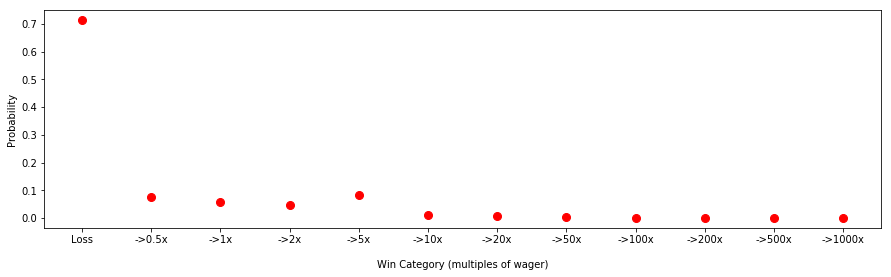

In [27]:
# plot probability distribution
fig, ax = plt.subplots(1, 1, figsize=(15,4))
labels20 = ['->{}x'.format([entry[-1] if entry[-1] < 1 else int(entry[-1])][0]) for entry in intervals20]
ax.plot(xk20, cleopatra20_model.pmf(xk20), 'ro', ms=8, mec='r')
labels20[0] = 'Loss'
ax.set_xticks(xk20)
ax.set_ylabel('Probability')
ax.set_xlabel('Win Category (multiples of wager)', labelpad=15)
tmp = ax.set_xticklabels(labels20)

So we have roughly a 70\% chance of losing. It helps to look at the winnings on a log scale.

Text(0.5,0,'Win Category (multiples of wager)')

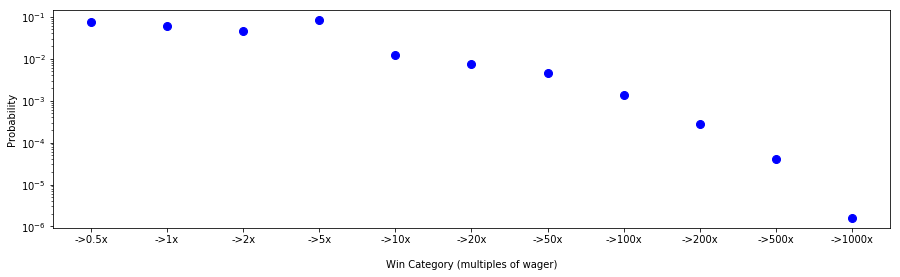

In [28]:
# And the winnings on a log scale
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(xk20[1:], cleopatra20_model.pmf(xk20)[1:], 'bo', ms=8, mec='b')
ax.set_xticks(xk20[1:])
tmp = ax.set_xticklabels(labels20[1:])
ax.set_yscale('log')
ax.set_ylabel('Probability')
ax.set_xlabel('Win Category (multiples of wager)', labelpad=15)

### High Volatility Game: 1-Line Cleopatra

The alternative to playing all 20 lines on Cleopatra is playing just 1 line. The 1-line version of the game is **much** more volatile. The payouts are less frequent, but no payout is less than double what you paid, and the max payout goes up to 20,000 times your bet!

The RTP is the same as before: 95.025\%.

In [29]:
# [0., 2.] is the losing interval
intervals1 = np.array([
                [0., 2.],
                [2., 5.],
                [5., 10.],
                [10., 20.],
                [20., 50.],
                [50., 100.],
                [100., 200.],
                [200., 500.],
                [500., 1000.],
                [1000., 2000.],
                [2000., 5000.],
                [5000., 10000.],
                [10000., 20000.]
            ])

# Payout is 95.025% with this scaling
cleopatra1_prob = 0.7233308569575265 * np.array(
[8761210, 628815, 1008567, 544354, 273149, 82322, 52222, 8952, 1532, 411, 21, 6]
) / 100000000.

cleopatra1_prob = np.array([1-np.sum(cleopatra1_prob), *cleopatra1_prob])

# construct probability distribution
xk1 = np.arange(len(cleopatra1_prob))
cleopatra1_model = st.rv_discrete(name='cleopatra', values=(xk1, cleopatra1_prob))

# Confirm that expected return from winnings is 95.025%
interval1_avg = np.array([np.mean(x) for x in intervals1[1:]])
print('Expected return is {}%'.format(100 * np.sum(cleopatra1_prob[1:] * interval1_avg)))

Expected return is 95.02499999999998%


Let's now compare the two probability distributions.

In [30]:
p20_win = np.sum(cleopatra20_prob[1:])
p1_win = np.sum(cleopatra1_prob[1:])
print('The probability of winning in 20-Line Cleopatra is {}%'.format(100 * p20_win))
print('The probability of winning in 1-Line Cleopatra is {}%'.format(100 * p1_win))

The probability of winning in 20-Line Cleopatra is 28.64026765632943%
The probability of winning in 1-Line Cleopatra is 8.218167654505212%


So you have a greater chance of winning something back in the 20-line game than the 1-line game. But when you **do** win, the winnings will be much higher in 1-Line than 20-Line Cleopatra.

In [31]:
avgwin_20 = np.sum(interval20_avg * cleopatra20_prob[1:]) / np.sum(cleopatra20_prob[1:])
avgwin_1 = np.sum(interval1_avg * cleopatra1_prob[1:]) / np.sum(cleopatra1_prob[1:])
print('Your average earnings in 20-Line Cleopatra are {} per win'.format(avgwin_20))
print('Your average earnings in 1-Line Cleopatra are {} per win'.format(avgwin_1))

Your average earnings in 20-Line Cleopatra are 3.3178810037761535 per win
Your average earnings in 1-Line Cleopatra are 11.56279647664612 per win


The product between the probability of winning and average earnings per win gives you the return of 95.025% in both games.

In [32]:
print(p20_win * avgwin_20)

0.95025


In [33]:
print(p1_win * avgwin_1)

0.9502499999999998


Here's a visualization of the two distributions.

Text(0.5,0,'Win Category (multiples of wager)')

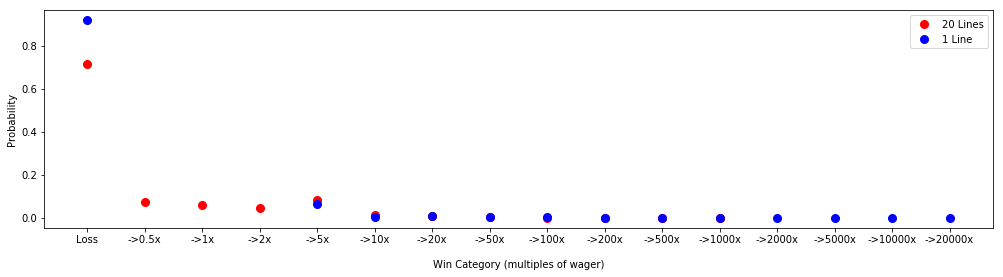

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(17,4))
labels = list(labels20)

# these were all the intervals between two distributions
# 0, 1, 2, 3 are losing for the 1-line game
# 0 is losing for the 20-line game
all_intervals = np.array([
                [0., 0.2],
                [0.2, 0.5],
                [0.5, 1.],
                [1., 2.],
                [2., 5.],
                [5., 10.],
                [10., 20.],
                [20., 50.],
                [50., 100.],
                [100., 200.],
                [200., 500.],
                [500., 1000.],
                [1000., 2000.],
                [2000., 5000.],
                [5000., 10000.],
                [10000., 20000.]
            ])
labels = ['->{}x'.format([entry[-1] if entry[-1] < 1 else int(entry[-1])][0]) for entry in all_intervals]
labels[0] = 'Loss'
ax.plot(xk20, cleopatra20_model.pmf(xk20), 'ro', ms=8, mec='r', label='20 Lines')
ax.plot([0] + list(range(4, 16)), cleopatra1_model.pmf(xk1), 'bo', ms=8, mec='b', label='1 Line')
ax.set_xticks(range(len(labels)))
ax.legend()
tmp = ax.set_xticklabels(labels)
ax.set_ylabel('Probability')
ax.set_xlabel('Win Category (multiples of wager)', labelpad=15)

It's easier to see the difference between winnings on a log scale

Text(0.5,0,'Win Category (multiples of wager)')

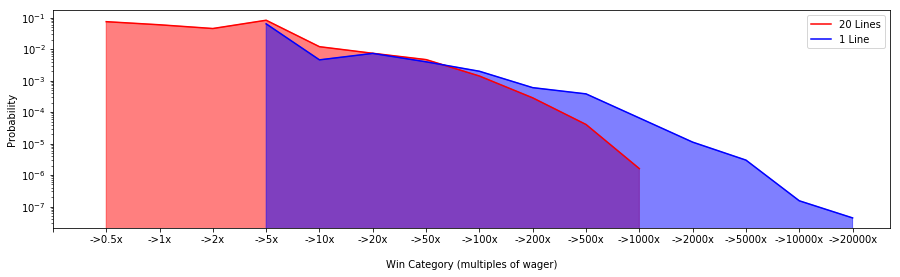

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
y20 = cleopatra20_model.pmf(xk20)
y1 = cleopatra1_model.pmf(xk1)
ax.plot(xk20[1:], y20[1:], '-r', label='20 Lines')
ax.fill_between(xk20[1:], 0, y20[1:], alpha=0.5, color='red')
ax.plot(list(range(4, 16)), y1[1:], '-b', label='1 Line')
ax.fill_between(list(range(4, 16)), 0, y1[1:], alpha=0.5, color='blue')
ax.set_xticks(range(len(labels)))
labels[0] = ''
tmp = ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
ax.set_ylabel('Probability')
ax.set_xlabel('Win Category (multiples of wager)', labelpad=15)

So the 1-line distribution allows for bigger wins with a lower probability.

## Simulations: Fixed Strategies

Finally - let's get to some simulations! In general we'll model our casino sessions as follows:

* We bet until we run out of money, or we're at or beyond the 3 hour mark.
* Each game takes 5 seconds. Switching machines takes 30 seconds.
* We both switch when we hit a big win (arbitrarily defined as 10 dollars).
* Lori only switches when she hits a big win, while Ben also switches when he dips below 90 cents on a game (aka three times his bet).

The last bullet point takes into account our different gambling styles. It means I end up playing fewer games than Lori because I spend more time hopping around. We'll see what effect this has on the results!

For each scenario, 1000 simulations are run. The maximum number of games played per session is the number of seconds in three hours, divided by the number of seconds it takes to play a game:

In [36]:
max_num_games = 60 * 60 * 3 / 5
max_num_games

2160.0

The minimum number of games depends on the amount of money one has to spend. With 100 dollars to spend, for example, Lori could be done in as soon as 333 games, or under a half hour of play.

### Scenario 1 (S1): Lori and I have 100 dollars to spend on 30 cent bets

In an example scenario, Lori and I are willing to lose the same amount of money and wager the same amount per game. The only difference between the two competitors is that I end up playing less than Lori.

In this scenario, both of us have a **relative wager** of 0.003:
\begin{align}
r_w &= \frac{\text{wager}}{\text{total to spend}} = \frac{0.3}{100} = 0.003
\end{align}

We will normalize the distribution of net winnings such that the maximum loss is 1.

#### 20-Line Game

Let's look at the distribution of net winnings for the 20-line game.

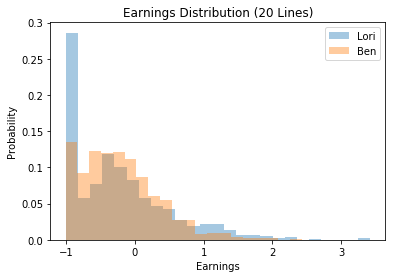

In [37]:
import seaborn as sns
import matplotlib

num_sims = 1000

def load(filename):
    results = np.load(filename)
    won = results['avg_won']  # avg money won per trip
    time = results['avg_time']  # avg time played per trip
    plays = results['avg_plays']  # avg number of plays per trip
    spent = results['avg_spent']  # avg money lost per trip
    return won, time, plays, spent

samestart_20 = load('strategies_20line_samestart.npz')

# We will call this function often to visualize the distribution of earnings for each set of simulations
def plot_earnings_dist(mats, inds, labels, colors=None, lines_played='20 Lines', nbins=20, normalize=None,
                      kde=False, hist=True, title='Earnings Distribution', alphas=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    ax.set_title('{} ({})'.format(title, lines_played))
    ax.set_xlabel('Earnings')
    for i in range(len(labels)):
        won = mats[i][0]
        spent = mats[i][-1]
        money = won - spent
        
        if normalize is not None:
            money = money / normalize[i]
        hist_kws = {'alpha': alphas[i]} if alphas is not None else None
        ind = inds[i]
        bins = nbins if isinstance(nbins, (int, float)) else nbins[i]
        sns.distplot(money[ind, :], bins=bins, kde=kde, hist=hist, label=labels[i], ax=ax, hist_kws=hist_kws)
    lines = [r for r in ax.get_children() if type(r) == matplotlib.lines.Line2D]
    if colors:
        [r.set_color(colors[i]) for i,r in enumerate(lines)]
    ax.legend()
    labels = [str(float(int(x)/num_sims)) for x in ax.get_yticks()]
    ax.set_yticklabels(labels)
    ax.set_ylabel('Probability')
    
    return lines
    
plot_earnings_dist([samestart_20, samestart_20], [0, 1], ['Lori', 'Ben'], normalize=[100, 100], nbins=[25, 20]);

The distributions are as we would expect. They are right-skewed, so that the average earnings are negative but we have a tail of wins. Lori loses all her money more often, but she is more likely to have bigger wins. On average, she wins more than I do.

In [38]:
time_max = 60 * 60 * 3  # 3 hours, in seconds
plays_max = 12 * 60 * 3  # 5 seconds per bet => 12 bets per minute

# the RTP (return to player, or what we get back for every dollar spent)
def pct_calc(output):
    return 100 * np.mean(output[0] / output[-1], axis=1)

In [39]:
print(r'On average, Lori made back {}% of what she spent.'.format(pct_calc(samestart_20)[0]))
print(r'On average, Ben made back {}% of what he spent.'.format(pct_calc(samestart_20)[1]))

On average, Lori made back 94.40410542868808% of what she spent.
On average, Ben made back 93.95656975043978% of what he spent.


#### 1-Line Game

For the 1-line game, neither of us end up playing often enough, or have enough money, to trigger the volatile jackpots. I do better simply because I take more breaks with my gambling style. From the graph below, we can see that I lose all my money roughly 45\% of the time, while Lori loses it all 65\% of the time.

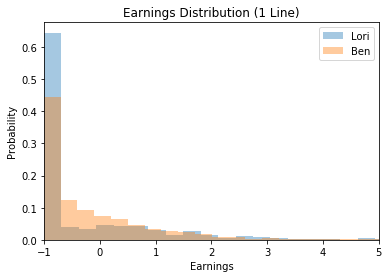

In [40]:
samestart_1 = load('strategies_1line_samestart.npz')

plot_earnings_dist([samestart_1, samestart_1], [0, 1], ['Lori', 'Ben'], lines_played='1 Line', nbins=50, normalize=[100, 100])
plt.xlim([-1, 5]);

Here's what we earn back.

In [41]:
print(r'On average, Lori made back {}% of what she spent.'.format(pct_calc(samestart_1)[0]))
print(r'On average, Ben made back {}% of what he spent.'.format(pct_calc(samestart_1)[1]))

On average, Lori made back 83.10102843275847% of what she spent.
On average, Ben made back 90.27372411175419% of what he spent.


---

For the next few scenarios, I am going to adjust my own betting conditions. I still switch machines when I'm down 3 times my bet and when I'm up ten dollars in a single session, for the sake of consistency. But I doubt this matters very much. 

---

### Scenario 2 (S2): What if I only have 40 dollars?

This scenario is closer to reality. I'm not usually comfortable spending more than 40 dollars at the casino. I feel too much guilt otherwise! So this means I'm likely to run out of money faster. My relative wager has more than doubled, because I'm spending more relative to what I have:

\begin{align}
r_w &= \frac{0.3}{40} = \frac{0.75}{100} > \frac{0.3}{100}
\end{align}

How does this affect the resulting distribution? We will compare the runs using "relative wager" units, so that the losses for S1 and S2 are normalized to 1.

#### 20-Line Game

In [42]:
diffstart_20 = load('strategies_20line_diffstart.npz')

print(r'In S1, Ben makes back {}% of what he spent.'.format(pct_calc(samestart_20)[1]))
print(r'In S2, Ben makes back {}% of what he spent.'.format(pct_calc(diffstart_20)[0]))
print(r'In S1, Lori makes back {}% of what she spent.'.format(pct_calc(samestart_20)[0]))

In S1, Ben makes back 93.95656975043978% of what he spent.
In S2, Ben makes back 86.20097578506063% of what he spent.
In S1, Lori makes back 94.40410542868808% of what she spent.


You can see from the distribution plot below that I run out of money more quickly, compared to when I start with 100 dollars. I have more than a 60% chance of losing it all, compared with 10% before.

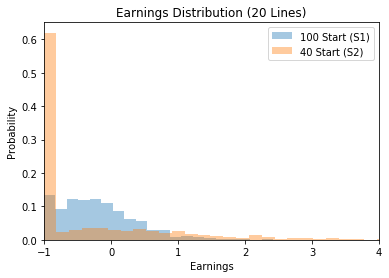

In [43]:
lines = plot_earnings_dist([samestart_20, diffstart_20], [1, 0], ['100 Start (S1)', '40 Start (S2)'],
                          lines_played='20 Lines', normalize=[100, 40], hist=True, nbins=[20, 40]);
plt.xlim([-1, 4]);

#### 1-Line Game

Same with the 1 line game. I lose all my money more often, and make back only about 72 percent of what I spend on average. I lose it all almost 80\% of the time!

In [44]:
diffstart_1 = load('strategies_1line_diffstart.npz')

print(r'In S1, Ben makes back {}% of what he spent.'.format(pct_calc(samestart_1)[1]))
print(r'In S2, Ben makes back {}% of what he spent.'.format(pct_calc(diffstart_1)[0]))
print(r'In S1, Lori makes back {}% of what she spent.'.format(pct_calc(samestart_1)[0]))

In S1, Ben makes back 90.27372411175419% of what he spent.
In S2, Ben makes back 72.28880419359893% of what he spent.
In S1, Lori makes back 83.10102843275847% of what she spent.


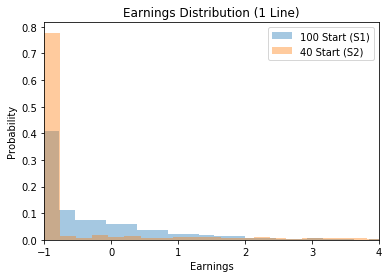

In [45]:
lines = plot_earnings_dist([samestart_1, diffstart_1], [1, 0], ['100 Start (S1)', '40 Start (S2)'],
                          lines_played='1 Line', nbins=[65, 70], normalize=[100, 40], hist=True)
plt.xlim([-1, 4]);

### Optimal Wagers

The results we've seen beg the question: is there an **optimal wager**, given the amount of money you're willing to lose and time you're willing to spend at the casino? Well - that depends how we define *optimal*.

Let's say we want to use a wager that gives us a decent chance of doubling our money and a relatively small chance of losing it all early. Let:

* $\alpha$ = the probability of losing $x$ - all the money a gambler is willing to risk parting with
* $\beta$ = the probability of winning at least $y$, a "big" win in the eyes of the gambler.
* $\gamma$ = the minimum value of $\beta$ we desire

Then our optimal (absolute) wager is:
\begin{align}
w^{\text{opt}}(x,y) &= \arg\limits_{w}\min \left\{\alpha(x,w)\;|\;\beta(y,w) > \gamma \right\}
\end{align}

Basically, we want to risk the least amount of money as possible to achieve whatever goal we desire.

#### 1 Line

Consider the result of placing 1, 10, and 30 cent bets on the 1-line game with a max loss of 40 dollars.

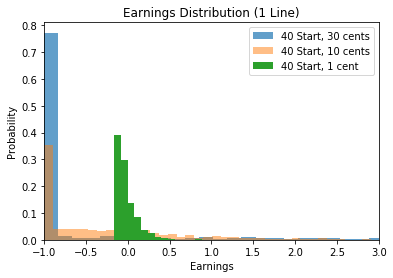

In [46]:
diffstart_ben1_1 = load('strategies_1line_diffstart_ben1.npz')
diffstart_ben10_1 = load('strategies_1line_diffstart_ben10.npz')
lines = plot_earnings_dist([diffstart_1, diffstart_ben10_1, diffstart_ben1_1], 
                           [0, 0, 0], 
                           ['40 Start, 30 cents', '40 Start, 10 cents', '40 Start, 1 cent'],
                           lines_played='1 Line',
                          normalize=[40, 40, 40], nbins=[100, 100, 20], alphas=[0.7, 0.5, 1.])

plt.xlim([-1, 3]);

With the 1 cent bet, you **never** lose all of your money, because it is impossible to lose 40 dollars in three hours with one cent bets. But the chances of winning anything substantial are minimal compared with the 10 cent or 30 cent wagers. The tradeoff between risk and reward is clear.

---

Let's look at the probabilities of doubling our money versus losing it all for these wagers. Because we start with 40 dollars, we're looking to leave the casino with 80. We would like at least a 10\% chance of achieving this outcome, so $\gamma=0.1$.

In [47]:
def pcalc(output, cond_function, ind=0):
    money = output[0] - output[-1]
    loss = len(money[ind, cond_function(money[ind, :])])
    return loss / len(money[ind, :])

lose40 = lambda x: x <= -40
gain40 = lambda x: x >= 40

# probability of losing it all
print('P(lose 40|30 cent wager) = {}'.format(pcalc(diffstart_1, lose40)))
print('P(lose 40|10 cent wager) = {}'.format(pcalc(diffstart_ben10_1, lose40)))
print('P(lose 40|1 cent wager) = {}'.format(pcalc(diffstart_ben1_1, lose40)))

print('\n')

# probability of winning 40
print('P(gain 40|30 cent wager) = {}'.format(pcalc(diffstart_1, gain40)))
print('P(gain 40|10 cent wager) = {}'.format(pcalc(diffstart_ben10_1, gain40)))
print('P(gain 40|1 cent wager) = {}'.format(pcalc(diffstart_ben1_1, gain40)))

P(lose 40|30 cent wager) = 0.517
P(lose 40|10 cent wager) = 0.226
P(lose 40|1 cent wager) = 0.0


P(gain 40|30 cent wager) = 0.14
P(gain 40|10 cent wager) = 0.115
P(gain 40|1 cent wager) = 0.002


The 10 cent wager is clearly superior. Compared to the 30 cent wager, there is a 2.5\% smaller chance of winning 40 dollars, but there is also a 29.1\% smaller chance of losing all your money! Note that the risk-reward ratio would be 0 for the 1 cent wager, but the probability of winning is only 0.2\%. Thus, we discard this entry.

Is there an even better wager than 10 cents for having at least a 10 percent chance of doubling our money? Let's find out.

optimal wager: $0.08


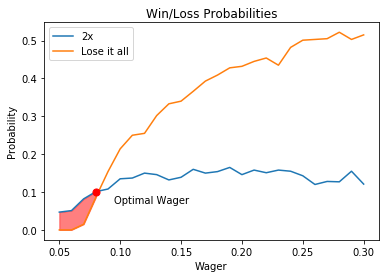

In [51]:
sweep1 = load('strategies_1line_ben_sweepwagers.npz')
s = sweep1[0].shape
inds = list(range(s[0]))
pv = np.vectorize(pcalc, excluded={0, 1})

pwins = pv(sweep1, gain40, inds)
plosses = pv(sweep1, lose40, inds)

wagers = np.linspace(.05, 0.3, 26)

# the optimal wager has a winning probability of at least 10%
print('optimal wager: ${}'.format(wagers[(pwins > 0.1)][0]))

fig, ax = plt.subplots(1, 1)
ax.plot(wagers, pwins, label='2x')
ax.plot(wagers, plosses, label='Lose it all')
ax.set_title('Win/Loss Probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel('Wager')
ax.fill_between(wagers[:4], pwins[:4], plosses[:4], alpha=0.5, color='red')
ax.legend();
ax.scatter([0.08], [pwins[3]], s=50, color='red', zorder=100)
ax.text(0.095, pwins[3]-.03, s='Optimal Wager');

The optimal wager for turning 40 dollars into 80 dollars is 8 cents, because it requires the least risk for the desired outcome. The shaded region indicates where the probability of winning is greater than the probability of losing it all. Note that the probability of losing it all increases **much faster** with the wager than the probability of doubling your money. Ideally, the optimal wager should be near the shaded region, or the risk outweighs the reward.

We'll see for the 20-line game that we need to adjust our expectations.

#### 20-Line

In the 20-line case, the probability of doubling your money doesn't reach 10\% until you're far from the intersection of the win and loss curves. This is because of the smaller average payouts on the 20-line machines vs the 1-line machines. Instead, if we can accept winning 1.5 times our bet, we will achieve an optimal wager in the shaded region.

optimal wager: $0.09


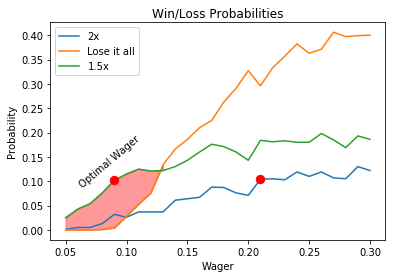

In [52]:
sweep20 = load('strategies_20line_ben_sweepwagers.npz')

pwins = pv(sweep20, gain40, inds)
plosses = pv(sweep20, lose40, inds)
pwins1pt5 = pv(sweep20, lambda x: x >= 20, inds)

wagers = np.linspace(.05, 0.3, 26)

# the optimal wager has a winning probability of at least 10%
print('optimal wager: $0.09')

fig, ax = plt.subplots(1, 1)
ax.plot(wagers, pwins, label='2x')
ax.plot(wagers, plosses, label='Lose it all')
ax.plot(wagers, pwins1pt5, label='1.5x')
ax.set_title('Win/Loss Probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel('Wager')
ax.legend()
ax.fill_between(wagers[:9], pwins1pt5[:9], plosses[:9], alpha=0.4, color='red')
ax.scatter([0.09], [pwins1pt5[4]], s=70, color='red', zorder=100)
ax.scatter([0.21], [pwins[16]], s=70, color='red', zorder=100)
ax.text(0.06, pwins1pt5[4]+.08, s='Optimal Wager', rotation=40);

With a 9 cent wager, we have about a 10\% chance of bringing home 1.5x what we started with, and only a 0.4\% chance of losing all our money! If we wanted to double our money, we would place a 21 cent wager, but we would be 3x more likely to lose it all.

## Dynamic Strategy: Changing Wagers

This last section is dedicated to *changing wagers*. When I go to the casino, I'll reduce my bet size when I win big, in an attempt to leave with a net win. Lori will often use the extra winnings to take a **larger** risk, in the hopes of hitting a big win on a large wager. How does this affect our winnings?

For these simulations, we both start with 100 dollars and set the following rules:

* When Lori is up 30 dollars or more, she'll start betting 50 cents instead of 30.
* When Ben is up 30 dollars or more, he'll start betting 10 cents instead of 30.

If we fall below our initial 100 dollars, we'll switch back to 30 cent bets. We'll keep our initial switching strategies (Lori switches only on big wins, while I switch if I'm down 3x my wager).

**Note**: Neither of us are betting optimally here. For me, an optimal bet on 100 dollars is 20 cents, and an optimal bet on 130 dollars is 26 cents. So we're betting larger than we should be to begin with, Lori is further increasing her risk-reward ratio at 130 dollars, and I'm pulling back to a low risk, low yield wager when I'm up. But these are our actual habits, and I'd like to see how they play out!

#### 20 Lines

For Lori, the larger dynamic wager has the effect of shifting the mass of the probability distribution to the left, so she is more likely to run out of cash. But she has a slightly better chance of winning big. Overall, it is a losing strategy for the 20 line game.

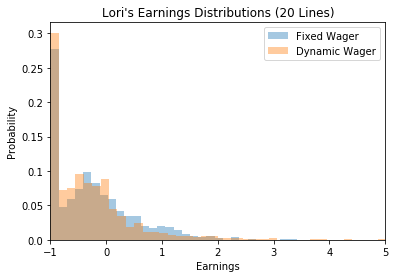

In [53]:
dynamic_20 = load('dynamic_20line.npz')

fig, ax = plt.subplots(1, 1)
plot_earnings_dist([samestart_20, dynamic_20], [0, 0], ['Fixed Wager', 'Dynamic Wager'], normalize=[100, 100],
                  nbins=[30, 40], title = 'Lori\'s Earnings Distributions', ax=ax)
ax.set_xlim([-1, 5]);

In [54]:
print('Lori\'s fixed wager strategy makes back {}% of what she spent.'.format(pct_calc(samestart_20)[0]))
print('Lori\'s dynamic wager strategy makes back {}% of what she spent.'.format(pct_calc(dynamic_20)[0]))

Lori's fixed wager strategy makes back 94.40410542868808% of what she spent.
Lori's dynamic wager strategy makes back 92.13186993257884% of what she spent.


For the 20-line game, my dynamic wager strategy shifts the mass of the distribution towards the break-even point, so I'm less likely to lose all my money and most likely to encounter smaller losses. Overall I beat the RTP with 95.36% of my money returned, but I have a smaller chance of bigger winnings.

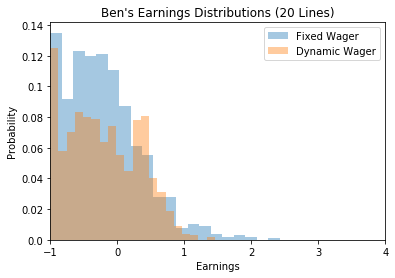

In [55]:
plot_earnings_dist([samestart_20, dynamic_20], [1, 1], ['Fixed Wager', 'Dynamic Wager'], normalize=[100, 100],
                  title = 'Ben\'s Earnings Distributions')
plt.xlim([-1, 4]);

In [56]:
print('Ben\'s fixed wager strategy makes back {}% of what he spent.'.format(pct_calc(samestart_20)[1]))
print('Ben\'s dynamic wager strategy makes back {}% of what he spent.'.format(pct_calc(dynamic_20)[1]))

Ben's fixed wager strategy makes back 93.95656975043978% of what he spent.
Ben's dynamic wager strategy makes back 95.36116121132994% of what he spent.


#### 1 Line

For the 1 line game, Lori faces the same situation. Wins are rare.

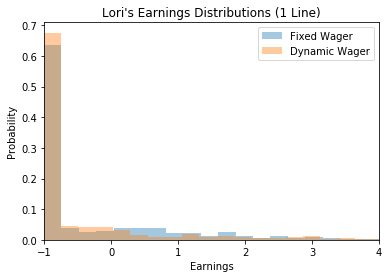

In [57]:
dynamic_1 = load('dynamic_1line.npz')

plot_earnings_dist([samestart_1, dynamic_1], [0, 0], ['Fixed Wager', 'Dynamic Wager'], normalize=[100, 100],
                  title = 'Lori\'s Earnings Distributions', nbins=[60, 55], lines_played='1 Line')
plt.xlim([-1, 4]);

In [58]:
print('Lori\'s fixed wager strategy makes back {}% of what she spent.'.format(pct_calc(samestart_1)[0]))
print('Lori\'s dynamic wager strategy makes back {}% of what she spent.'.format(pct_calc(dynamic_1)[0]))

Lori's fixed wager strategy makes back 83.10102843275847% of what she spent.
Lori's dynamic wager strategy makes back 81.2179027783589% of what she spent.


In the 1 line game, my results are extremely surprising! I earn back 99.2% of what I spend! My hypothesis is that because the 1 line games yield bigger winnings on average, I get to play a sufficient number of games with my 30 dollar winnings to trigger a big win.

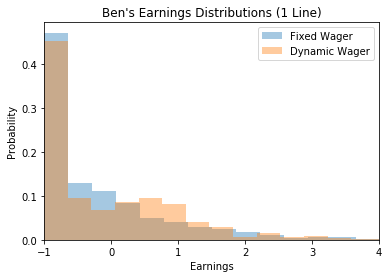

In [59]:
plot_earnings_dist([samestart_1, dynamic_1], [1, 1], ['Fixed Wager', 'Dynamic Wager'], normalize=[100, 100],
                  title = 'Ben\'s Earnings Distributions', nbins=[42, 60], lines_played='1 Line')
plt.xlim([-1, 4]);

In [60]:
print('Ben\'s fixed wager strategy makes back {}% of what he spent.'.format(pct_calc(samestart_1)[1]))
print('Ben\'s dynamic wager strategy makes back {}% of what he spent.'.format(pct_calc(dynamic_1)[1]))

Ben's fixed wager strategy makes back 90.27372411175419% of what he spent.
Ben's dynamic wager strategy makes back 99.2652943583449% of what he spent.


## Conclusions

From the experiments above, we come to the following conclusions:

* High volatility games pay out less often, but the average payouts are larger, while low-volatility games pay out more often with smaller average winnings.
* The optimal wager gives you a sufficiently large probability of achieving a desired outcome (e.g. doubling your money) while minimizing the probability of losing it all.
* Reducing your wager when you're up is a great way to improve your odds of leaving the casino with a win.
* Don't take these results too seriously: You're going to lose money no matter what!